# Car Prices Poland


### Predict sale prices for cars in Poland


### Data Exploration

In [1]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px


In [2]:
#Importing the dataset
df=pd.read_csv("../input/car-prices-poland/Car_Prices_Poland_Kaggle.csv")

In [3]:
# look the data set
df.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


In [5]:
#checking null value 
df.isna().sum()

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

### a lot of missing value at generation name column , I will drop this colume and colume Unnamed: 0 I don`t using this colume with my analysis

In [6]:
df.drop(columns=["generation_name","Unnamed: 0"],inplace=True)

In [7]:
df.isna().sum()

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [8]:
# let see the data describe
df.describe().round(2)

,year,mileage,vol_engine,price
count,117927.00,117927.00,117927.00,117927.00
mean,2012.93,140976.79,1812.06,70299.88
std,5.69,92369.36,643.61,84824.58
min,1945.00,0.00,0.00,500.00
25%,2009.00,67000.00,1461.00,21000.00
50%,2013.00,146269.00,1796.00,41900.00
75%,2018.00,203000.00,1995.00,83600.00
max,2022.00,2800000.00,7600.00,2399900.00


### let's see what the famous car

In [9]:
df["mark"].value_counts(normalize=True)

audi             0.102021
opel             0.101029
bmw              0.093872
volkswagen       0.091989
ford             0.081949
mercedes-benz    0.060512
renault          0.059155
skoda            0.049929
toyota           0.043417
peugeot          0.042874
volvo            0.037176
hyundai          0.034191
kia              0.031748
nissan           0.026050
fiat             0.024422
mazda            0.024151
seat             0.024151
citroen          0.023065
honda            0.018452
mitsubishi       0.009497
mini             0.009226
alfa-romeo       0.005970
chevrolet        0.005156
Name: mark, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


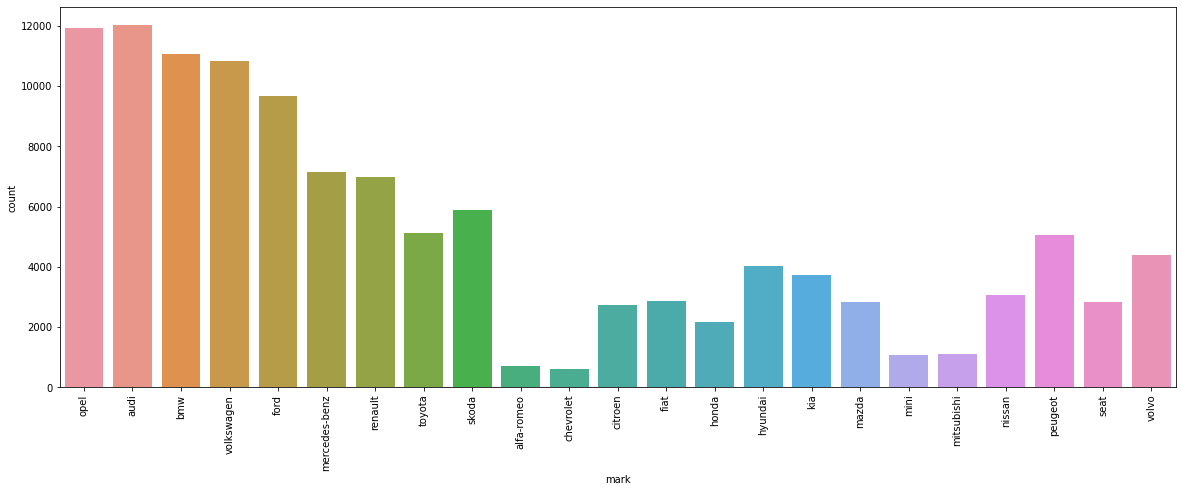

In [10]:

plt.figure(figsize=(20,7))
sns.countplot(df["mark"])
plt.xticks(rotation=90)
plt.show()

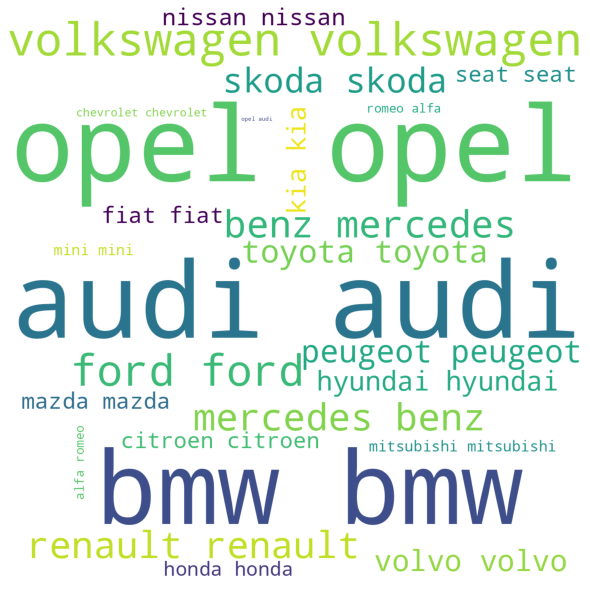

In [11]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.mark:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

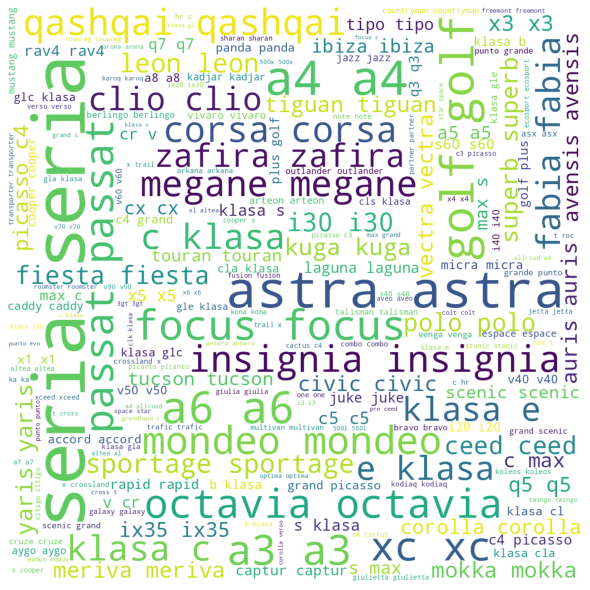

In [12]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.model:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


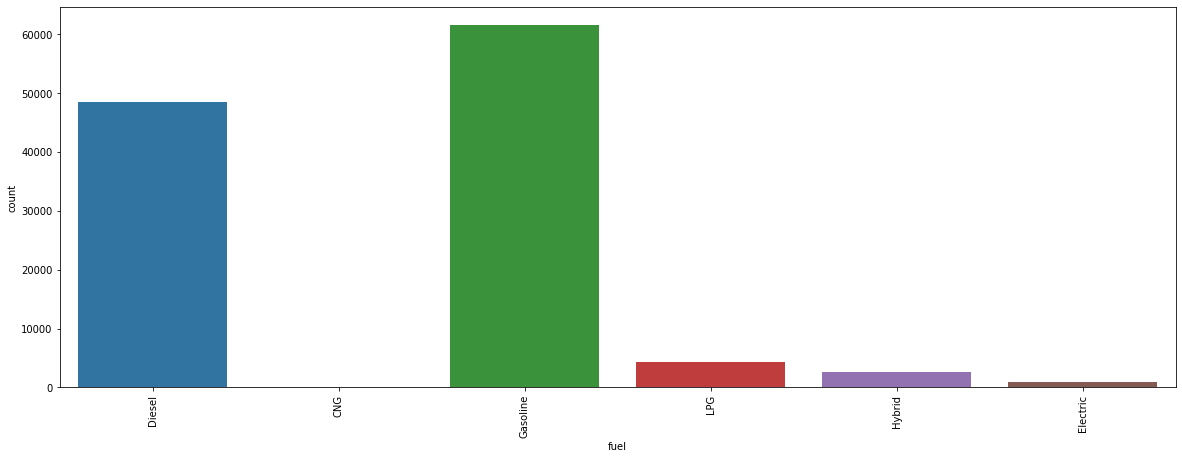

In [13]:
#Fuel
plt.figure(figsize=(20,7))
sns.countplot(df["fuel"])
plt.xticks(rotation=90)
plt.show()

In [14]:
px.scatter(df,x="year",y="price",animation_frame="mark",color="fuel")

<AxesSubplot:xlabel='vol_engine', ylabel='price'>

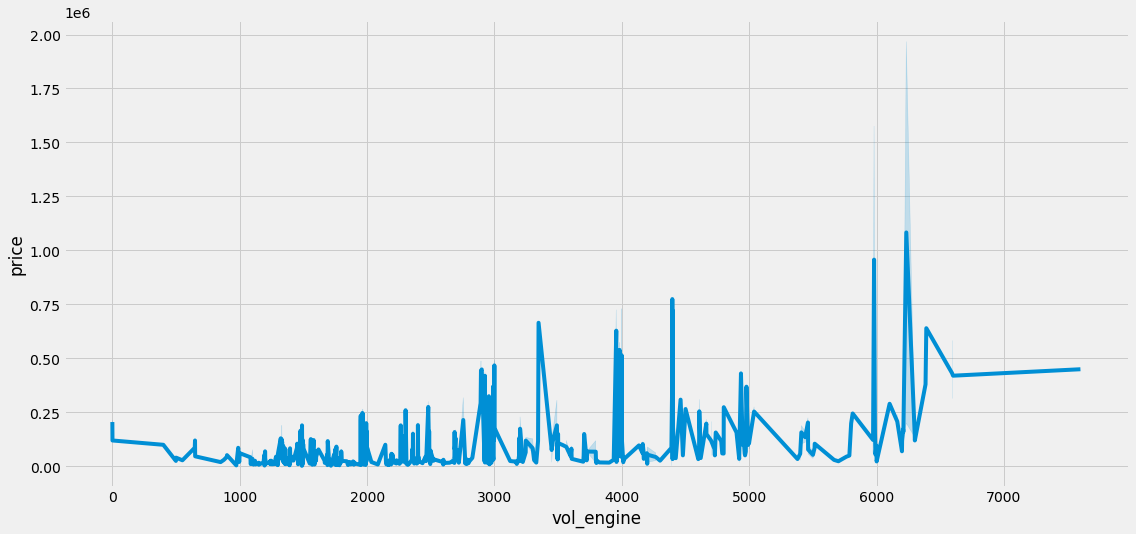

In [15]:
# let see how change the price for this vol_engine  

plt.style.use("fivethirtyeight")
plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="vol_engine",y="price")

In [16]:
# let`s make group by mark

group=df.groupby("mark")["price"].mean()
group.sort_values()

mark
citroen           34098.127206
opel              35109.647641
fiat              39326.176389
chevrolet         40287.218750
seat              40455.214185
renault           45034.324541
peugeot           47144.632714
nissan            49635.930664
mitsubishi        51085.781250
honda             51344.852941
ford              51801.098613
toyota            54567.395703
hyundai           54830.428571
mazda             57337.477528
kia               59718.260417
skoda             61684.046365
volkswagen        61800.779591
alfa-romeo        69643.068182
mini              72247.548713
audi             105034.593799
volvo            110734.153741
bmw              122836.902168
mercedes-benz    139316.949271
Name: price, dtype: float64

#### high price Mercedes , BMW, Volvo,Audi

<AxesSubplot:xlabel='mark'>

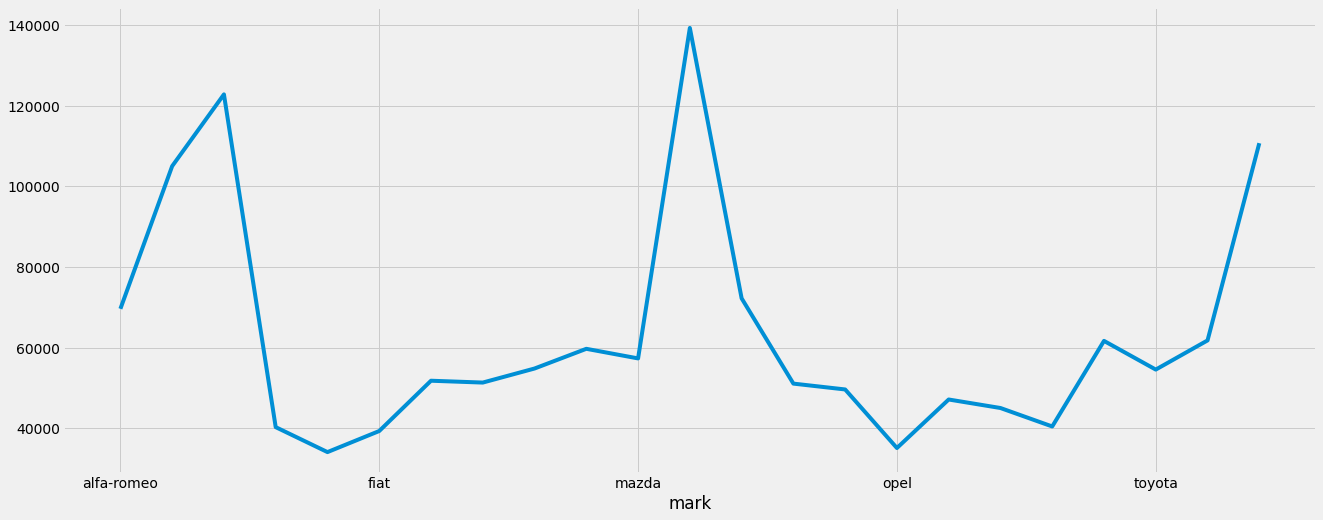

In [17]:
group.plot(figsize=(20,8))

In [18]:
# let`s make group by fuel

group2=df.groupby("fuel")["price"].mean()
group2.sort_values()

fuel
LPG          27013.299930
CNG          30979.829787
Gasoline     66054.888322
Diesel       71971.990696
Hybrid      169417.107974
Electric    193078.917514
Name: price, dtype: float64

<AxesSubplot:xlabel='fuel'>

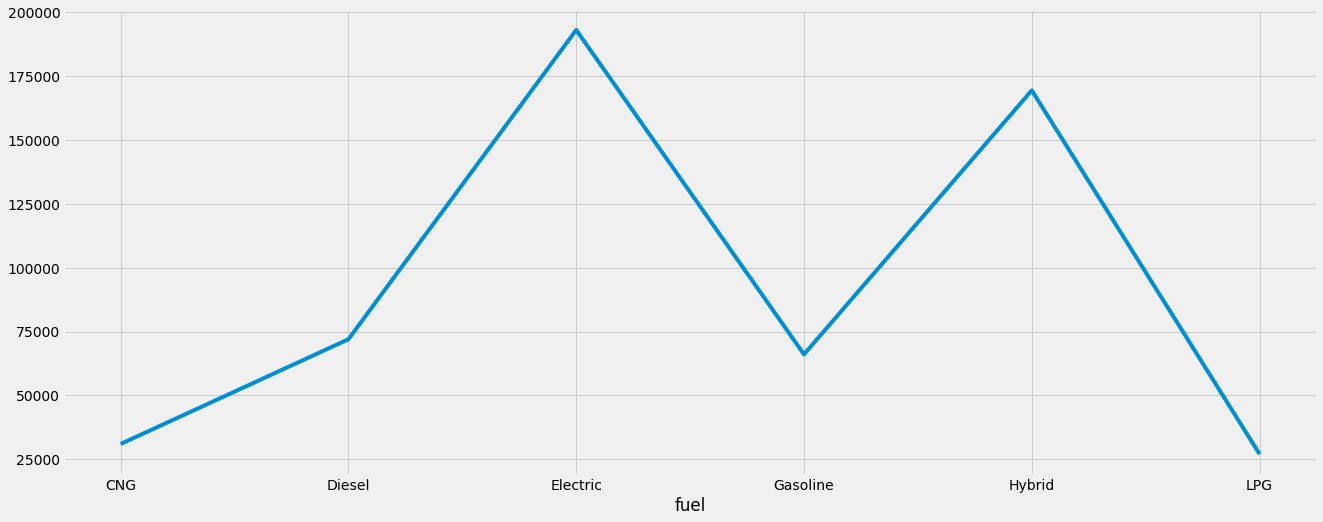

In [19]:
group2.plot(figsize=(20,8))

## After take knowledge and analysis about the data let start building model --- Machine Learning

In [20]:
df.head()

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [21]:
new_df=df.drop(columns=["mark","model","fuel","city","province"],axis=1)
new_df.head()

,year,mileage,vol_engine,price
0,2015,139568,1248,35900
1,2018,31991,1499,78501
2,2015,278437,1598,27000
3,2016,47600,1248,30800
4,2014,103000,1400,35900


In [22]:
#Defined X value and y value 

X=new_df.drop("price",axis=1)
y=new_df["price"]

In [23]:
# now make X Y  train, test, split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [24]:
print("X Train : ", X_train.shape)
print("X Test : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test : ", y_test.shape)

X Train :  (94341, 3)
X Test :  (23586, 3)
Y Train :  (94341,)
Y Test :  (23586,)


In [25]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=model.predict(X_test)
y_pred

array([ 72994.08790187,  -5808.20175767, 138042.26099812, ...,
        71990.37647876, -17160.35997849, 174121.24270377])

In [27]:
mean_absolute_error(y_test,y_pred)

32804.72271404606

In [28]:
model.coef_

array([ 6.48286818e+03, -2.90713155e-01,  5.70349957e+01])

## The End *